Due to the fact that weather can be really changed during day, it is no use to predict effectiveness of solar panels every hour. Also, there are not included aspects of the day - like position of sun or if it is day or night. So it is better to focus on full days which can show us better how effectiveness of solar panels. It is possible to score full year with forecasting data which can show us effectiveness during the year.

In [27]:
import pandas as pd

In [28]:
# This is our choice. Data for every minute has many empty rows. Hour data have aggregation based on min-max. We think that average will be better.
df = pd.read_csv('EXPORT TenMinData - Feeders.csv')

/var/folders/f_/1f21rmxs29z6pyrpb6hklc900000gn/T/ipykernel_12517/2268090965.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EXPORT TenMinData - Feeders.csv')


In [3]:
# Check if this works with potential in docs.
df_sub = df[df['Substation']=='YMCA'][['PA', 'PB', 'PC']]

In [4]:
df_sub.sort_values(by='PA', ascending=False)

,PA,PB,PC
867549,23.663,7.834,9.188
866403,23.297,7.916,11.206
869277,23.207,8.633,10.000
866402,22.363,9.286,10.237
867546,21.881,11.796,14.717
...,...,...,...
850093,-8.696,-5.854,-0.530
851244,-8.756,-8.752,5.059
852109,-8.825,-6.584,1.886
852970,-8.978,-8.151,2.546


In [5]:
df_sub.sort_values(by='PB', ascending=False)

,PA,PB,PC
852588,12.884,16.807,9.984
857631,8.640,16.474,7.436
861372,7.043,16.402,6.812
863086,13.339,15.946,10.178
872011,16.610,15.922,12.404
...,...,...,...
852981,-8.491,-8.613,0.156
850250,-8.070,-8.623,-0.497
851242,-7.674,-8.749,1.769
851244,-8.756,-8.752,5.059


In [6]:
df_sub.sort_values(by='PC', ascending=False)

,PA,PB,PC
853298,2.736,7.205,21.720
853297,0.396,4.866,20.876
862896,1.156,1.335,20.603
871010,11.252,10.249,20.516
871582,12.543,8.643,20.168
...,...,...,...
991549,-2.026,-2.320,-2.212
996847,0.893,-1.477,-2.214
991255,-1.791,2.848,-2.233
991555,-2.127,-2.230,-2.237


In [7]:
import matplotlib.pyplot as plt

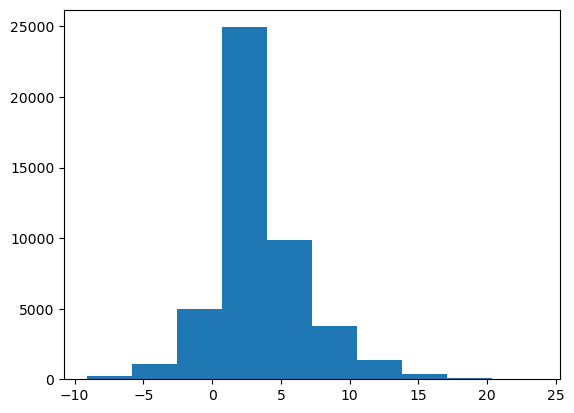

In [8]:
plt.hist(df_sub['PA'])
plt.show()

In [9]:
df_sub['PA'].max()

23.663

In [10]:
df_test = df_sub[['PA', 'PB', 'PC']].max(axis=1)

In [12]:
df_test.max()

23.663

In [13]:
df['P'] = df[['PA', 'PB', 'PC']].max(axis=1) # We use the fase with highest power output.

In [16]:
df = df[['Substation', 't_date', 'P']]

In [17]:
df['Substation'].unique()

array(['Warninglid Lane', 'Chapel Lane', 'Southcroft', 'Bircham Newton',
       'Rampling Court', 'Forest Road', 'Alverston Close', 'Carters Mead',
       'Maple Drive East', 'Suffolk Road', 'Old Mill', 'Bankfield Way',
       'Fairview Road', 'Elm Crescent', 'Bancroft Close', 'Rookery Farm',
       'Priesthawes', 'Upper Staplefield Common', 'East Hill Costessey',
       'YMCA'], dtype=object)

In [18]:
# Seems proper to max potential
df.loc[df['Substation'] == 'Elm Crescent', 'P'] = df[df['Substation'] == 'Elm Crescent']['P'] / 92
df.loc[df['Substation'] == 'YMCA', 'P'] = df[df['Substation'] == 'YMCA']['P'] / 25
df.loc[df['Substation'] == 'Forest Road', 'P'] = df[df['Substation'] == 'Forest Road']['P'] / 85
df.loc[df['Substation'] == 'Maple Drive East', 'P'] = df[df['Substation'] == 'Maple Drive East']['P'] / 63

In [20]:
df_agg = df.groupby(['Substation', 't_date']).agg({'P': 'mean'}) # mean power in full day.

In [21]:
df_agg = df_agg.reset_index()

In [22]:
df_agg.groupby('Substation').agg({'P': 'mean'})

,P
Substation,
Alverston Close,18.419891
Bancroft Close,13.884964
Bankfield Way,10.306156
Bircham Newton,9.275919
Carters Mead,5.935271
Chapel Lane,8.804536
East Hill Costessey,7.294175
Elm Crescent,0.029600
Fairview Road,5.293175


In [23]:
# Drop Bircham Newton Substation due to emptiness of weather data.
df_agg = df_agg[df_agg['Substation']!='Bircham Newton']

In [24]:
df_agg.groupby('Substation').agg({'P': 'sum'})

,P
Substation,
Alverston Close,3002.442222
Bancroft Close,2263.249146
Bankfield Way,1679.903410
Carters Mead,955.578650
Chapel Lane,1294.266836
East Hill Costessey,1188.950460
Elm Crescent,4.765619
Fairview Road,862.787585
Forest Road,6.945921


In [25]:
df_agg.to_csv('Feeders - day_agg.csv') # save to csv

In [26]:
# average effectiveness seems pretty low - but nighttime is included and also UK is quite cloudy.
df_agg[df_agg['Substation'] == 'YMCA'].max()

Substation          YMCA
t_date        2014-11-19
P               0.247817
dtype: object